In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [9]:
# Define the stock symbols for pairs of companies
pairs = [
    ("AAPL", "MSFT"),  # Technology
    ("GOOGL", "META"),  # Technology
    ("NVDA", "AMD"),  # Technology
    ("JPM", "BAC"),  # Financial
    ("GS", "MS"),  # Financial
    ("AMZN", "TSLA"),  # Consumer Discretionary
    ("PFE", "JNJ"),  # Healthcare
    ("CVX", "COP"),  # Energy
    ("KO", "PEP"),  # Consumer Staples
    ("VZ", "T"),
    ("BRK-B","MSFT")  # Telecommunications
]

In [10]:
# Function to fetch data and calculate correlation and cointegration
def calculate_correlation_and_cointegration(pair):
    # Fetch historical data for each company
    data = yf.download(pair, start="2020-01-01", end="2024-01-01")['Adj Close']
    
    # Calculate daily returns
    returns = data.pct_change().dropna()
    
    # Calculate correlation
    correlation = returns.corr().iloc[0, 1]
    
    # Perform ADF test for cointegration
    adf_result = adfuller(data[pair[0]] - data[pair[1]])
    cointegration_pvalue = adf_result[1]
    
    return correlation, cointegration_pvalue, data

# Store results in a list
results = []

[*********************100%***********************]  2 of 2 completed


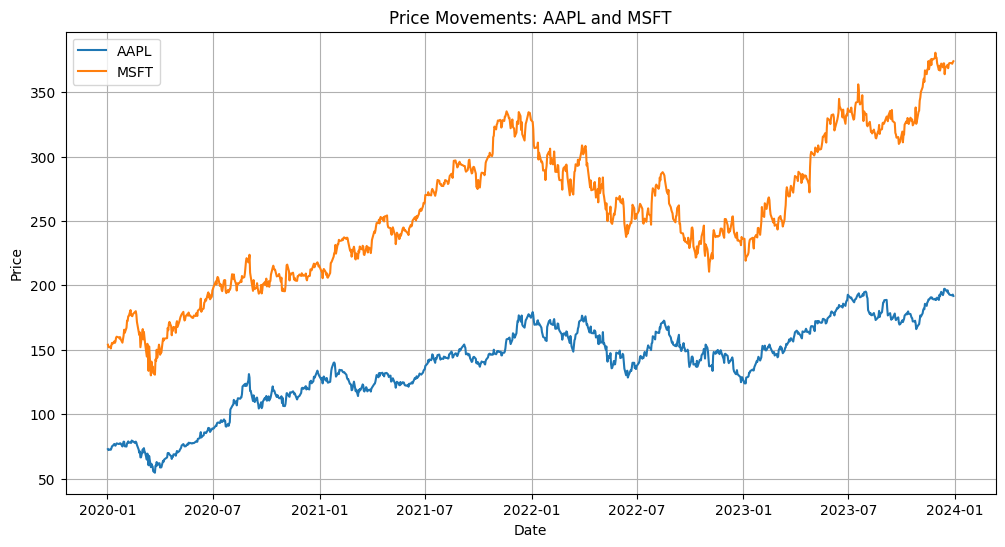

[*********************100%***********************]  2 of 2 completed


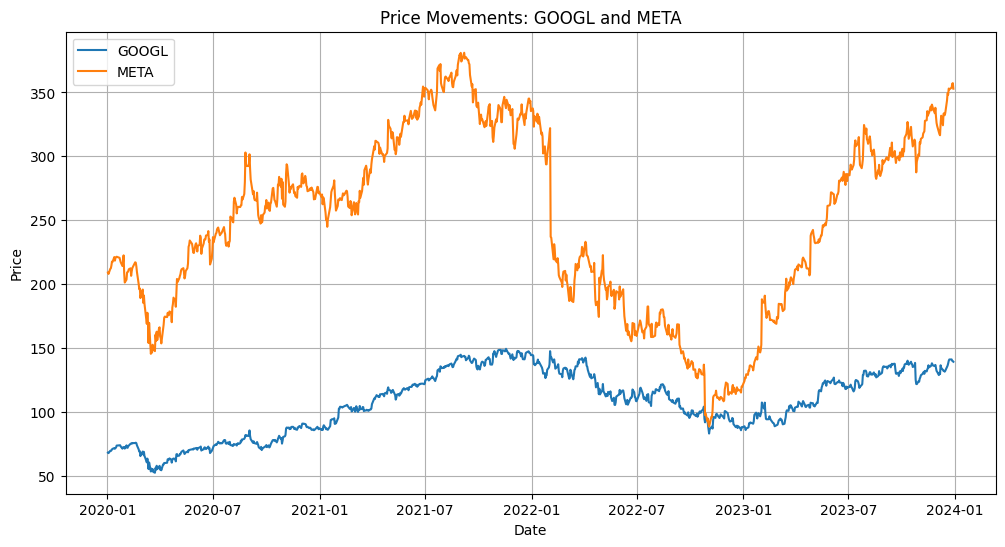

[*********************100%***********************]  2 of 2 completed


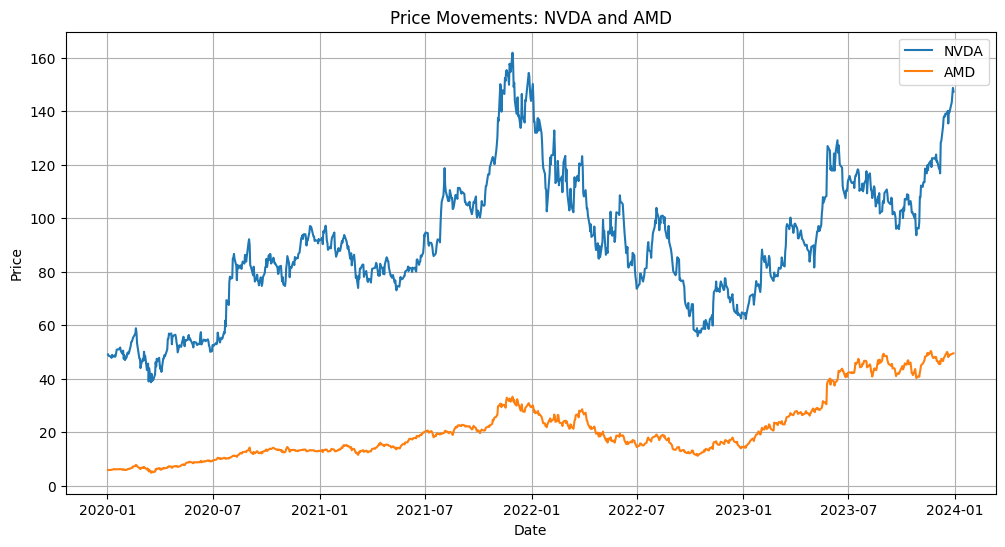

[*********************100%***********************]  2 of 2 completed


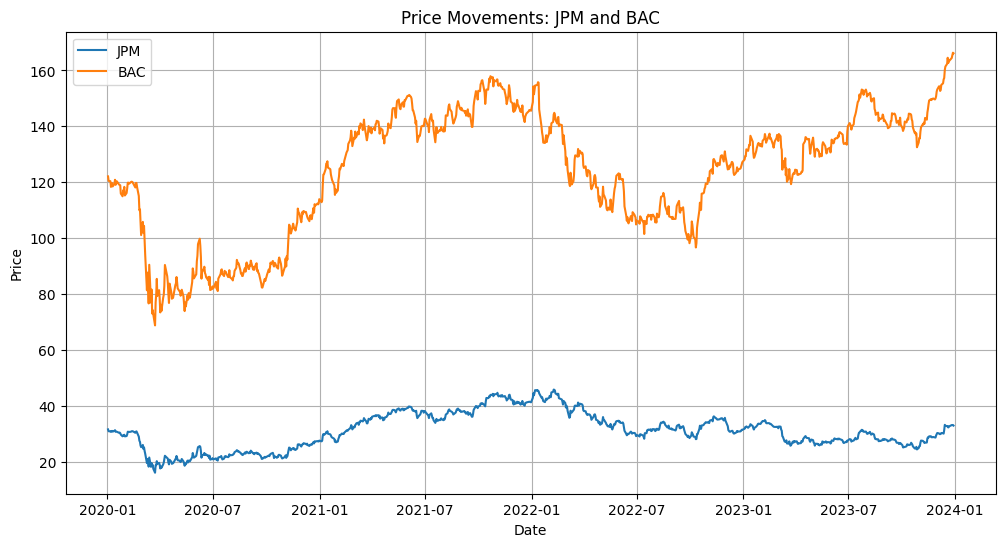

[*********************100%***********************]  2 of 2 completed


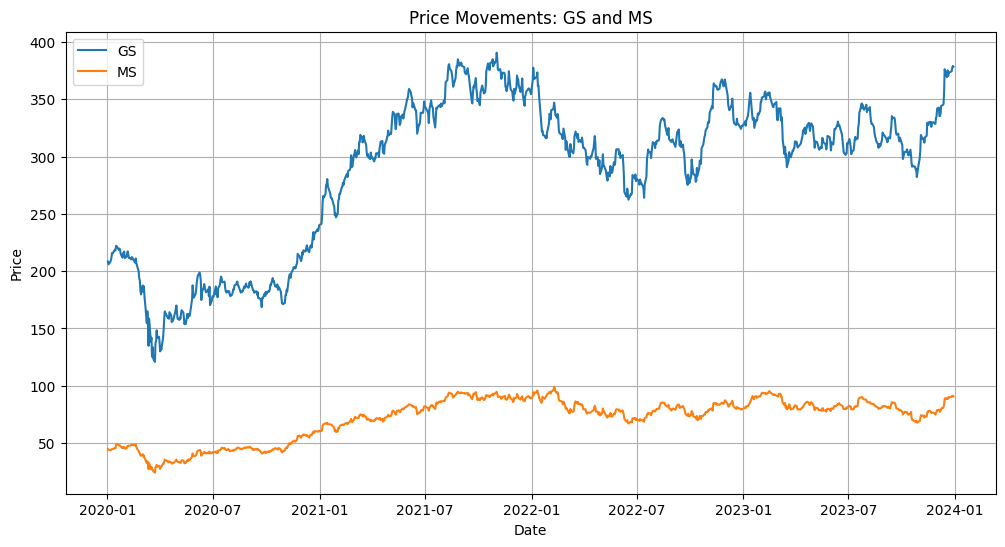

[*********************100%***********************]  2 of 2 completed


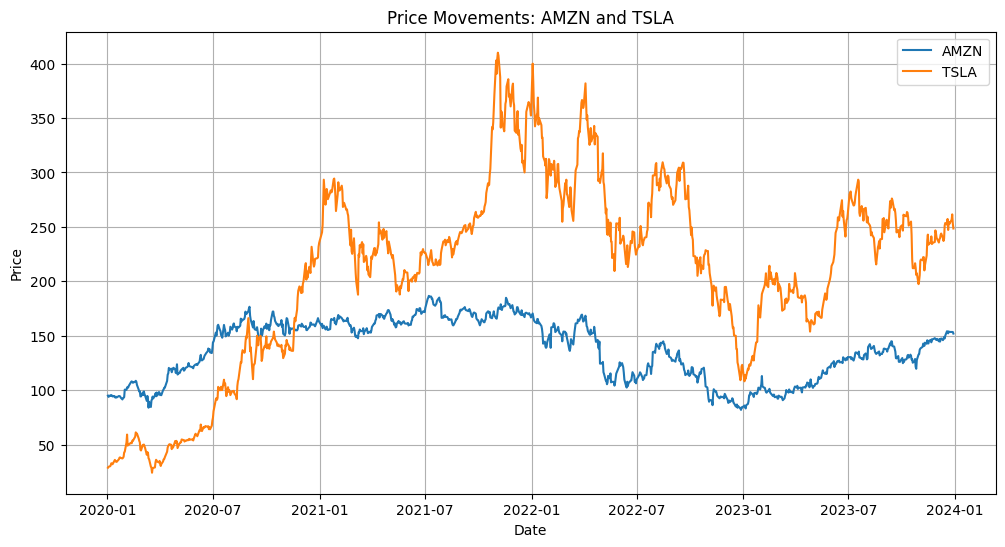

[*********************100%***********************]  2 of 2 completed


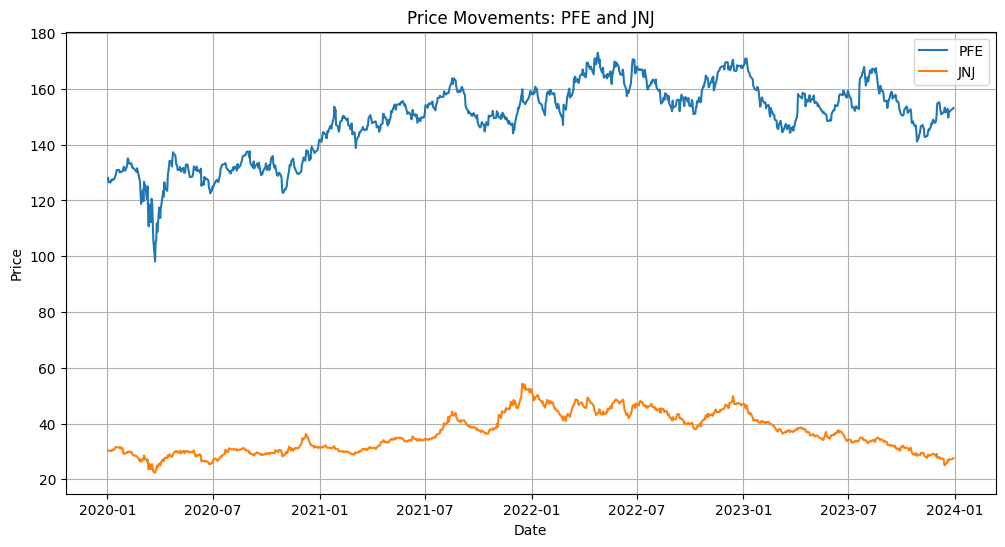

[*********************100%***********************]  2 of 2 completed


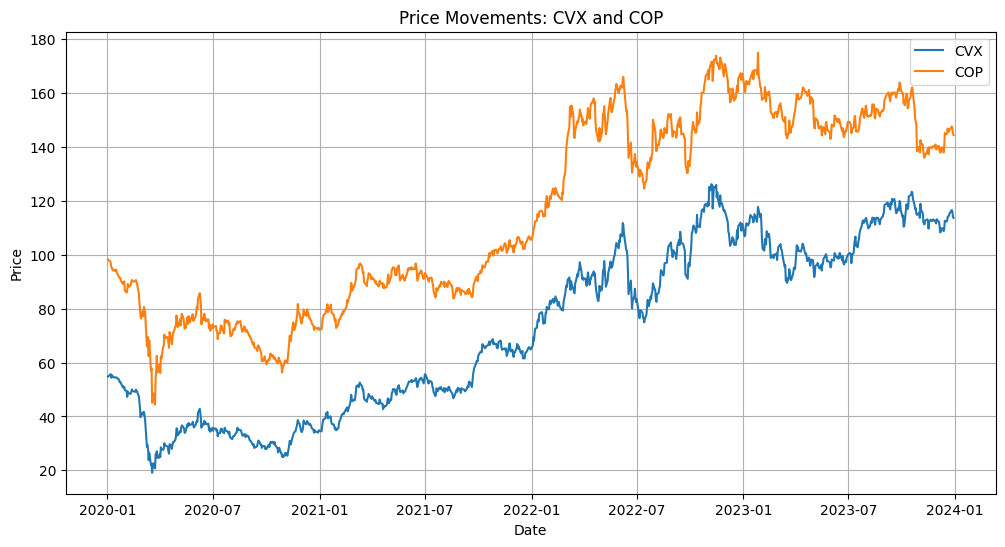

[*********************100%***********************]  2 of 2 completed


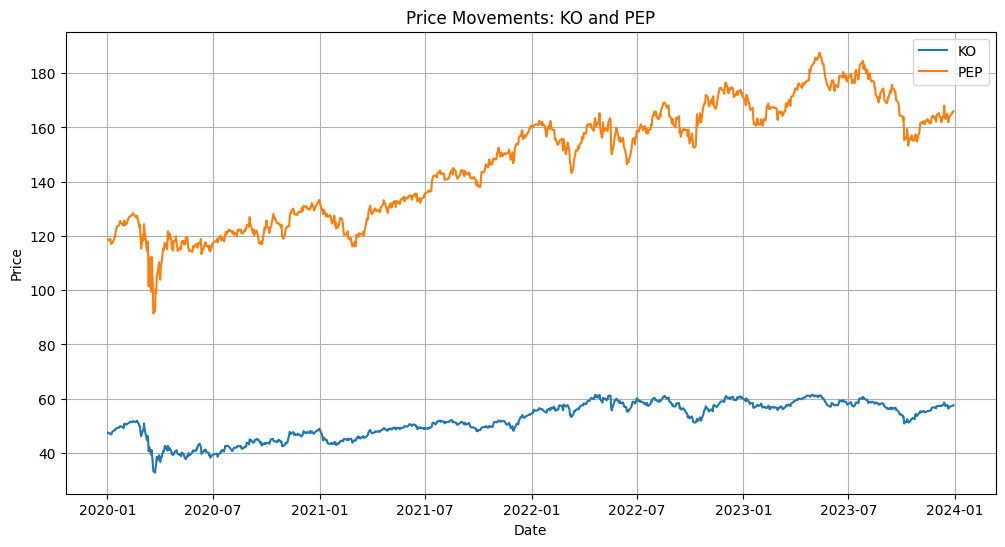

[*********************100%***********************]  2 of 2 completed


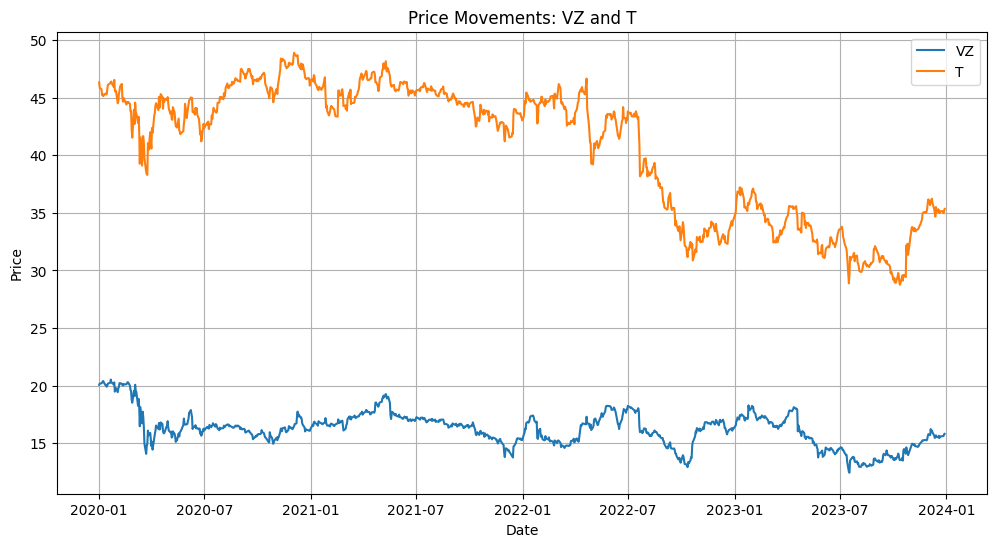

[*********************100%***********************]  2 of 2 completed


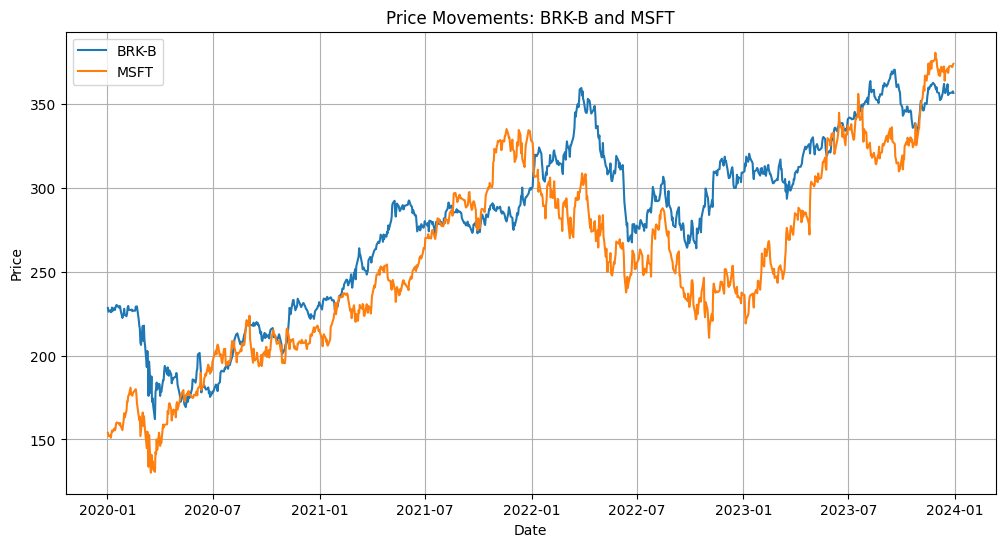

In [11]:
# Loop through each pair and calculate correlation and cointegration
for company1, company2 in pairs:
    correlation_value, cointegration_pvalue, data = calculate_correlation_and_cointegration((company1, company2))
    results.append({'Company 1': company1, 'Company 2': company2, 'Correlation': correlation_value, 'Cointegration P-Value': cointegration_pvalue})
    
    # Plot price movements for each pair
    plt.figure(figsize=(12, 6))
    plt.plot(data, label=[company1, company2])
    plt.title(f'Price Movements: {company1} and {company2}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# Convert results list to a DataFrame
results_df = pd.DataFrame(results)